# Power law

## Review:
### Power law distributions
* Special kind of probability distribution
$$P(x) = C x^{-\alpha}\quad \text{for} \quad x \geqslant x_{min} > 0$$

where C is a normalization constant to fulfill: $\int_{x_{min}}^{\infty} P(x) dx = 1$.

With the help of `sympy` (symbolic python, similiar to the symbolic toolbox in Matlab), we can calculate the value of C.

In [ ]:
import sympy
x, C, alpha, xmin = sympy.symbols('x C alpha x_{min}', positive=True)
P = C * x ** (-alpha)
P

C/x**alpha

In [ ]:
integral_result = sympy.integrate(P, (x, xmin, sympy.oo)) # oo refers to infinity
integral_result

Piecewise((C*x_{min}/(x_{min}**alpha*(alpha - 1)), alpha > 1), (Integral(C/x**alpha, (x, x_{min}, oo)), True))

The result shows that when $\alpha > 1$, the integral is $\frac{C x_{min}^{1-\alpha}}{\alpha - 1}$, otherwise, this integral will diverge.

In [ ]:
integral_result.args[0]

(C*x_{min}/(x_{min}**alpha*(alpha - 1)), alpha > 1)

In [ ]:
integral_result = integral_result.args[0][0] # get the integral for alpha > 1
sympy.simplify(integral_result)

C*x_{min}**(1 - alpha)/(alpha - 1)

In [ ]:
solution = sympy.solve(integral_result -1, C)[0] # solve the equation for C, integral_result - 1 = 0
solution

x_{min}**(alpha - 1)*(alpha - 1)

Thus, $C = (\alpha-1)/x_{min}^{1-\alpha}$. And the distribution P(x) we can obtain by:

In [ ]:
P = P.subs(C, solution) # substitude the solution
P = sympy.simplify(P)
P

x_{min}**(alpha - 1)*(alpha - 1)/x**alpha

Finally, $P(x) = (\alpha-1)x_{min}^{\alpha-1}x^{-\alpha}$.

### Moments

The n-th moment of a distribution is : $\left< x^k \right> = \int_{x_{min}}^{\infty} x^k P(x) dx$

In [ ]:
k = sympy.Symbol('k', positive=True)
moments_k = sympy.integrate(P * x ** k, (x, xmin, sympy.oo))
sympy.simplify(moments_k)

Piecewise((-C*x_{min}**(-alpha + k + 1)/(-alpha + k + 1), alpha - k > 1), (C*Integral(x**(-alpha + k), (x, x_{min}, oo)), True))

$$\left< x^k \right> = x^k_{min}\frac{\alpha-1}{\alpha-k-1} \quad \text{for} \quad \alpha > 1 + k$$
otherwise
$$\left< x^k \right> \quad \text{diverges}$$

### Visualizing powerlaw distributions
It is convenient to visualize powerlaws on a log-log plot using

$$\log{P(x)} = -\alpha \log{x} + \log{C}$$
By using a log-log plot, a powerlaw shows up as a straight line with a slope that equals the exponent $-\alpha$.

#### From the formula

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def powerlaw(x, alpha, xmin=1):
    assert x.min() >= xmin, f'the minimum x should larger than {xmin}'
    C = xmin ** (alpha-1) * (alpha - 1)
    return C * x** (- alpha)

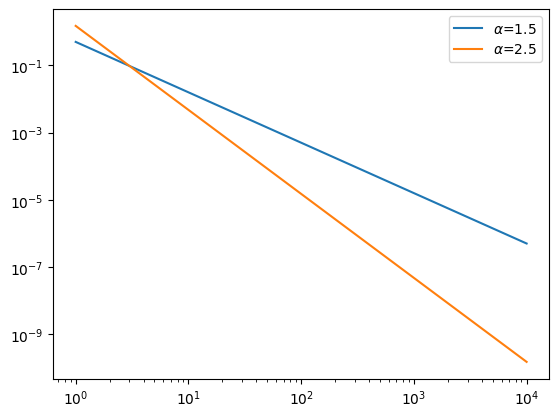

In [ ]:
xx = np.linspace(1, 10**4, 100)
plt.plot(xx, powerlaw(xx, 1.5), label=r"$\alpha$=1.5")
plt.plot(xx, powerlaw(xx, 2.5), label=r"$\alpha$=2.5")
plt.xscale('log')
plt.yscale('log')
plt.legend()

#### From random numbers

In the scipy.stats module, there is a class [pareto](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html#scipy.stats.pareto) that can be used to generate continuous random variables that follow a

> Pareto Distribution: $$P(x, b) = \frac{b}{x^{b+1}}$$ where $x \geqslant 1$ and $b>0$

In [ ]:
from scipy.stats import pareto
b = 0.5 # equivalent to alpha = 1.5
r = pareto.rvs(b, size=10000) # generate 10000 random numbers from pareto distribution

Once we have the random numbers, we can compute the histogram by using [numpy.histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)

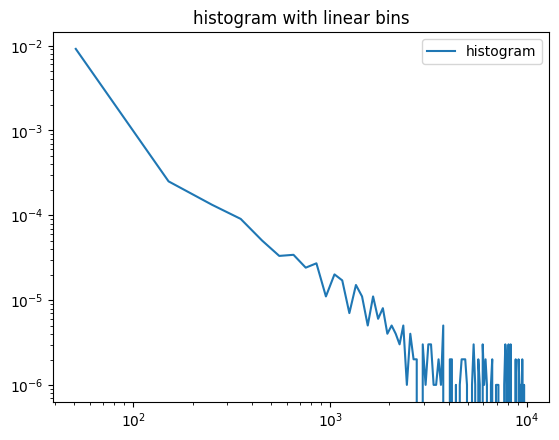

In [ ]:
hist, bin_edges = np.histogram(r, bins=100, range=(1, 10000), density=True)
# with density=True the result is the value of the probability density function at the bin
bin_center = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.plot(bin_center, hist, label='histogram')
plt.title("histogram with linear bins")
plt.legend()
plt.xscale('log')
plt.yscale('log')

On the right-hand side, the distribution is very noisy because of low statistics and sampling errors. The power-law distribution dwindles in this region, meaning that each bin only has a few samples in it. So the fluctuations of the bin counts are large and this appears as a noisy curve on the plot.
One way to deal with this is to vary the width of the bins in the histogram. The most common choice is to increase the bin size logarithmically to adjust for lower statistics. This is known as `logarithmic binning`.

In [ ]:
b = np.logspace(0, 3, 10)
np.log(b)

array([0.        , 0.76752836, 1.53505673, 2.30258509, 3.07011346,
       3.83764182, 4.60517019, 5.37269855, 6.14022691, 6.90775528])

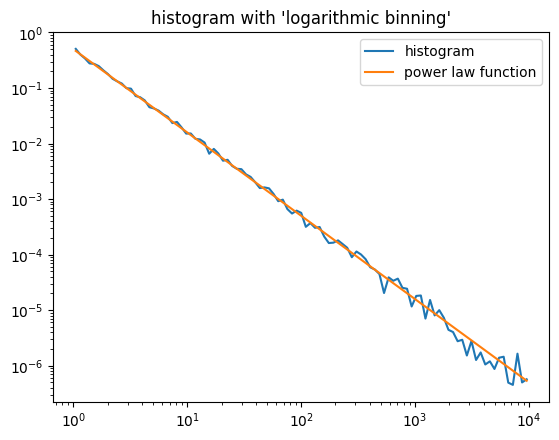

In [ ]:
hist, bin_edges = np.histogram(r, bins=np.logspace(0, 4, 100), density=True)
# with density=True the result is the value of the probability density function at the bin
bin_center = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.plot(bin_center, hist, label='histogram')
plt.plot(bin_center, powerlaw(bin_center, 1.5), label="power law function")
plt.title("histogram with 'logarithmic binning'")
plt.legend()
plt.xscale('log')
plt.yscale('log')

## Fit a power law distribution

### Polynomial fit
The simplest way to fit a histogram with a power-law distribution is by using a straight line, in other words, fit the relation between log y and log x by a polynomial of order 1.

In [ ]:
p = np.polyfit(np.log(bin_center), np.log(hist), deg=1)
p

array([-1.52167932, -0.62886385])

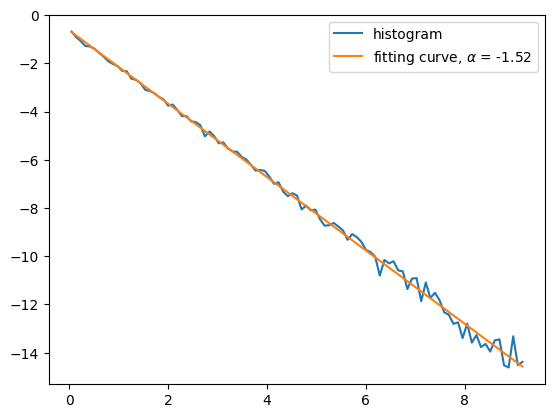

In [ ]:
plt.plot(np.log(bin_center), np.log(hist), label='histogram')
plt.plot(np.log(bin_center), np.log(bin_center) * p[0] + p[1], label=f"fitting curve, $\\alpha$ = {p[0]:.2f}")
plt.legend()